# 분포 통계량

In [5]:
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
# 한글 폰트 설정 
# 아래 중 하나를 선택하여 사용하거나, 시스템에 설치된 다른 한글 폰트 경로를 지정하세요
try:
    # 윈도우 한글 폰트
    if sys.platform == 'win32':
        font_path = r'C:\Windows\Fonts\malgun.ttf'  # 맑은 고딕
        font_name = fm.FontProperties(fname=font_path).get_name()
        plt.rc('font', family=font_name)
    # macOS 한글 폰트
    elif sys.platform == 'darwin':
        plt.rc('font', family='AppleGothic')
    # 리눅스 한글 폰트
    else:
        plt.rc('font', family='NanumGothic')
        
    # 마이너스 부호 깨짐 해결
    mpl.rcParams['axes.unicode_minus'] = False
    
    print("한글 폰트 및 마이너스 부호 설정 완료")
except:
    print("한글 폰트 설정 실패. 시스템에 한글 폰트가 설치되어 있는지 확인하세요.")

한글 폰트 및 마이너스 부호 설정 완료


## 왜도 실제 적용
- 데이터의 정규성(Normality) 개선 변환 적용
- 양의 왜도(positive skewness)의 분포를 가진 데이터

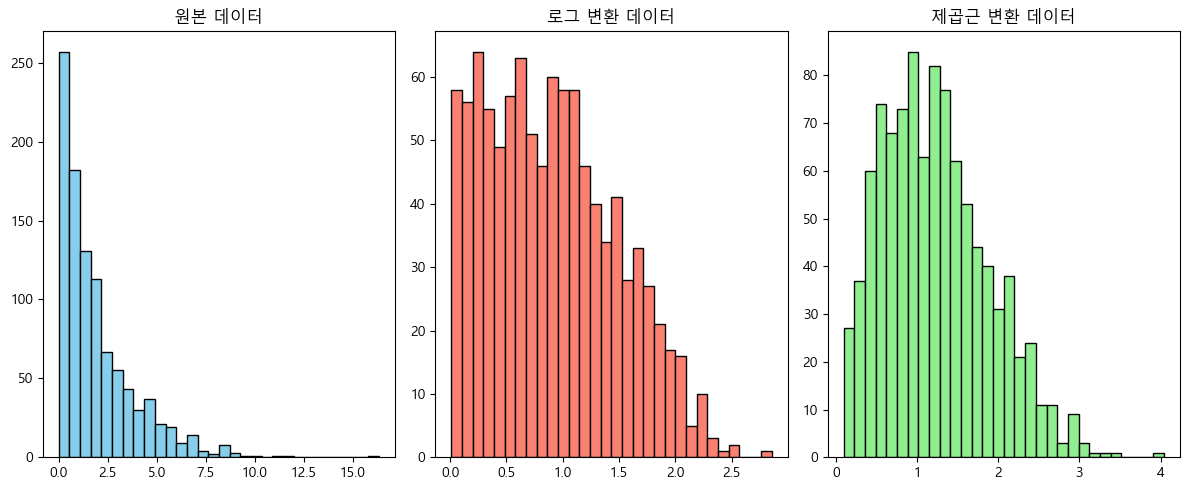

,변환 방식,왜도(Skewness),첨도(Kurtosis)
0,원본 데이터,1.865034,5.217828
1,로그 변환,0.428363,-0.603112
2,제곱근 변환,0.597687,0.025079


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib

# 한글 폰트 설정
matplotlib.rc("font", family="Malgun Gothic")

# 재현성을 위해 시드 설정
np.random.seed(42)

# 오른쪽으로 치우친(양의 왜도) 데이터 생성 
# 지수 분포(Exponential Distribution)를 따르는 난수 1000개 발생생
data = np.random.exponential(scale=2, size=1000)

# 로그 변환 적용
log_data = np.log(data + 1)  # 0 방지
sqrt_data = np.sqrt(data)  # 제곱근 변환

# 왜도와 첨도 계산
original_skew, original_kurt = stats.skew(data), stats.kurtosis(data)
log_skew, log_kurt = stats.skew(log_data), stats.kurtosis(log_data)
sqrt_skew, sqrt_kurt = stats.skew(sqrt_data), stats.kurtosis(sqrt_data)

# 결과 출력
results = pd.DataFrame({
    "변환 방식": ["원본 데이터", "로그 변환", "제곱근 변환"],
    "왜도(Skewness)": [original_skew, log_skew, sqrt_skew],
    "첨도(Kurtosis)": [original_kurt, log_kurt, sqrt_kurt]
})

# 데이터 분포 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.hist(data, bins=30, color='skyblue', edgecolor='black')
plt.title("원본 데이터")

plt.subplot(1, 3, 2)
plt.hist(log_data, bins=30, color='salmon', edgecolor='black')
plt.title("로그 변환 데이터")

plt.subplot(1, 3, 3)
plt.hist(sqrt_data, bins=30, color='lightgreen', edgecolor='black')
plt.title("제곱근 변환 데이터")

plt.tight_layout()
plt.show()

results

C:\Users\magpi\AppData\Local\Temp\ipykernel_22992\850112231.py:25: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\magpi\anaconda3\envs\eda_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


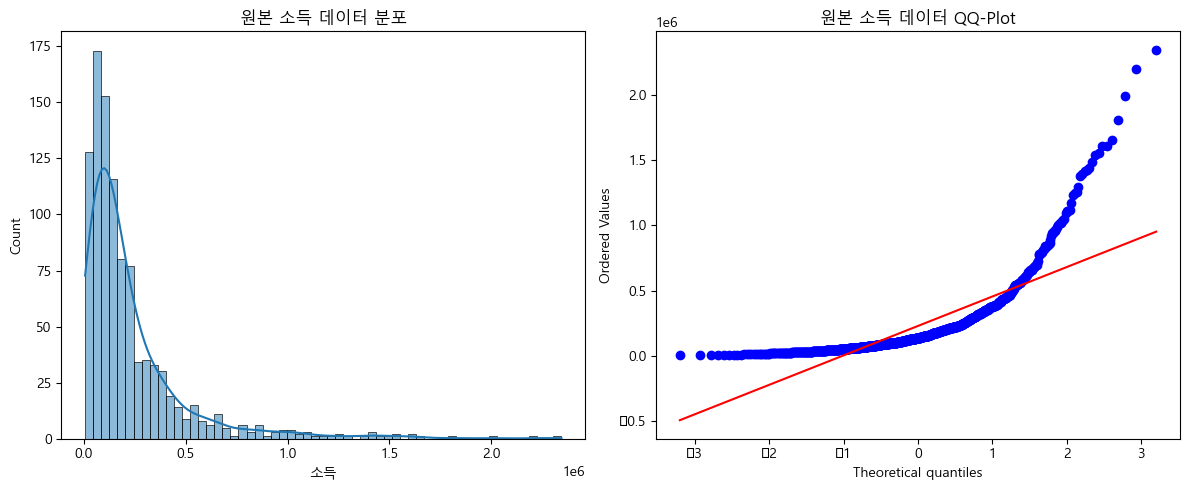

원본 데이터 왜도: 3.174128262441809


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 오른쪽 왜도를 갖는 데이터 생성 (예: 소득 데이터)
np.random.seed(0)
data = np.random.lognormal(mean=5, sigma=1, size=1000) * 1000  # 로그 정규 분포를 따르는 데이터 생성 (단위: 천원)

# 데이터프레임으로 변환
df = pd.DataFrame({'소득': data})

# 원본 데이터 분포 확인
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['소득'], kde=True)
plt.title('원본 소득 데이터 분포')

plt.subplot(1, 2, 2)
stats.probplot(df['소득'], plot=plt)
plt.title('원본 소득 데이터 QQ-Plot')

plt.tight_layout()
plt.show()

print(f"원본 데이터 왜도: {df['소득'].skew()}")

Box-Cox 변환 람다 값: -0.011644359996512449


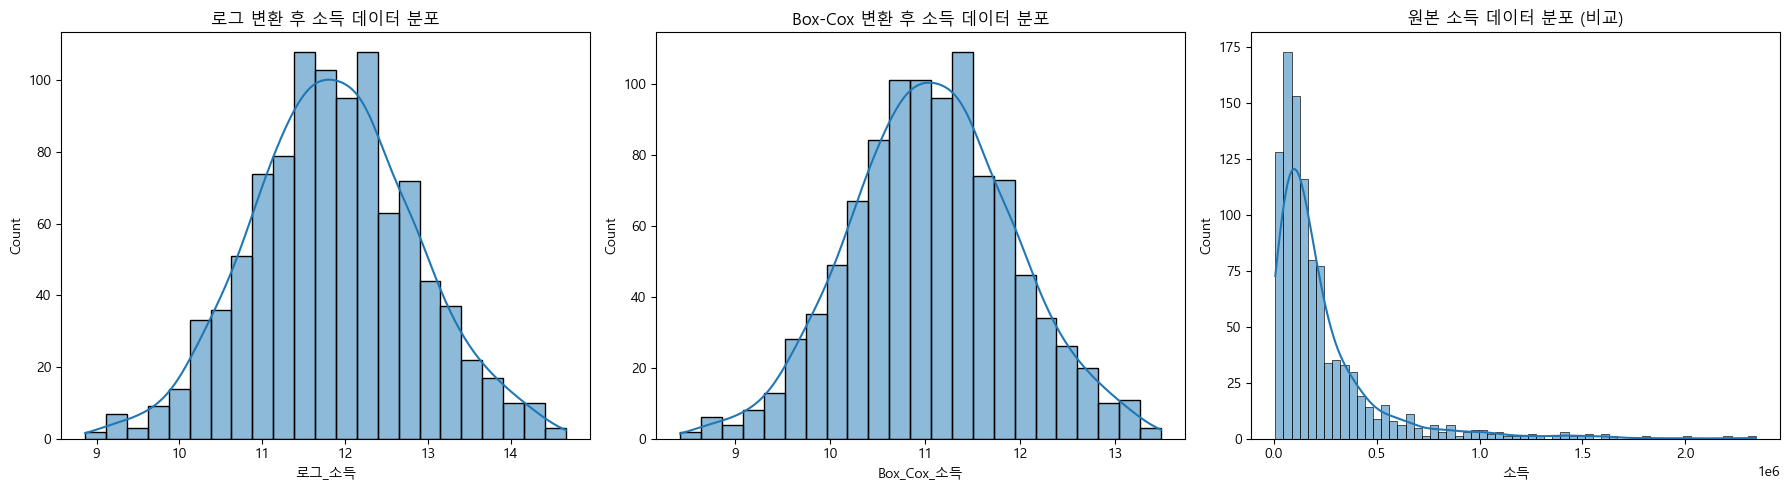

C:\Users\magpi\AppData\Local\Temp\ipykernel_22992\899559694.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\magpi\anaconda3\envs\eda_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


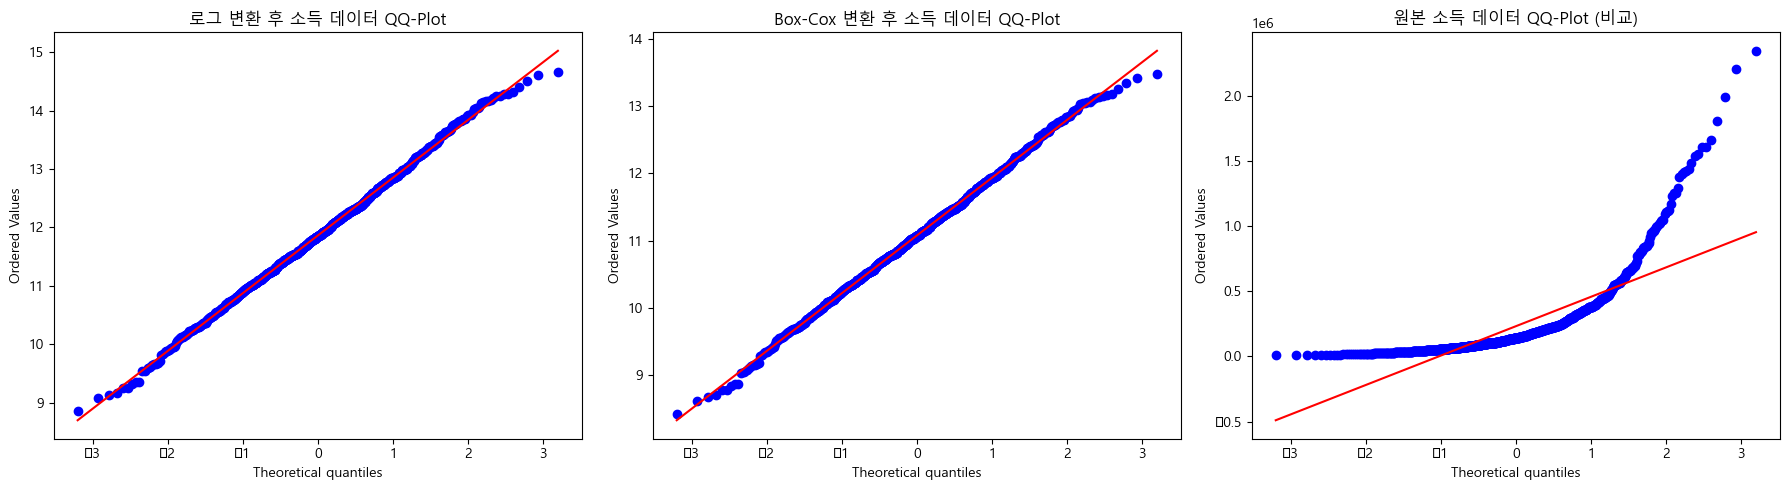

로그 변환 후 왜도: 0.03390983920295714
Box-Cox 변환 후 왜도: 0.00016954486534017708


In [6]:
# 로그 변환
df['로그_소득'] = np.log(df['소득'])

# Box-Cox 변환
transformed_data, lambda_value = stats.boxcox(df['소득'])
df['Box_Cox_소득'] = transformed_data

print(f"Box-Cox 변환 람다 값: {lambda_value}")

# 변환된 데이터 분포 확인
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['로그_소득'], kde=True)
plt.title('로그 변환 후 소득 데이터 분포')

plt.subplot(1, 3, 2)
sns.histplot(df['Box_Cox_소득'], kde=True)
plt.title('Box-Cox 변환 후 소득 데이터 분포')

plt.subplot(1, 3, 3)
sns.histplot(df['소득'], kde=True)
plt.title('원본 소득 데이터 분포 (비교)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
stats.probplot(df['로그_소득'], plot=plt)
plt.title('로그 변환 후 소득 데이터 QQ-Plot')

plt.subplot(1, 3, 2)
stats.probplot(df['Box_Cox_소득'], plot=plt)
plt.title('Box-Cox 변환 후 소득 데이터 QQ-Plot')

plt.subplot(1, 3, 3)
stats.probplot(df['소득'], plot=plt)
plt.title('원본 소득 데이터 QQ-Plot (비교)')

plt.tight_layout()
plt.show()

print(f"로그 변환 후 왜도: {df['로그_소득'].skew()}")
print(f"Box-Cox 변환 후 왜도: {df['Box_Cox_소득'].skew()}")

원본 데이터 왜도: 1.865034222864843


C:\Users\magpi\AppData\Local\Temp\ipykernel_22992\1204215485.py:34: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\magpi\anaconda3\envs\eda_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


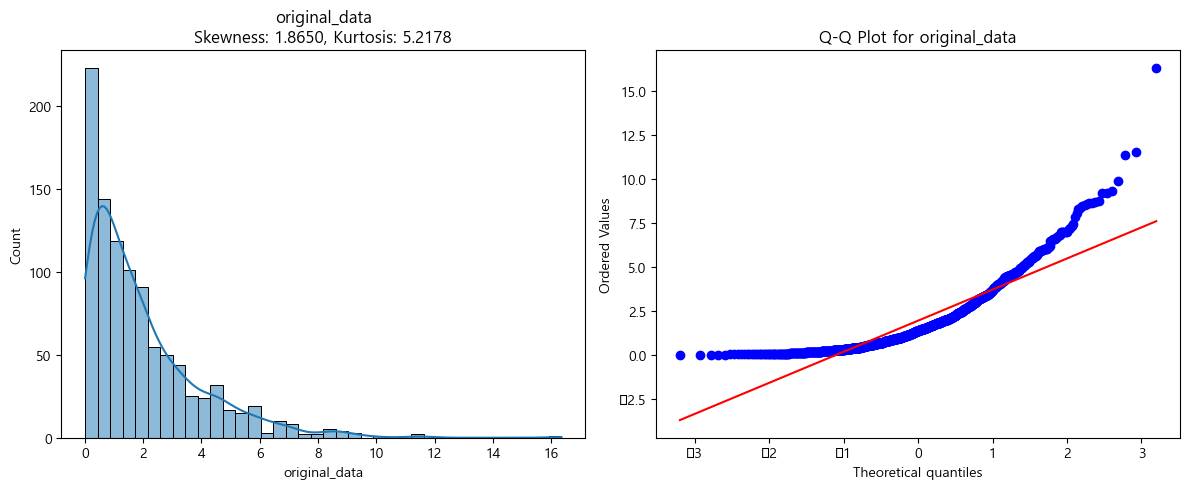

C:\Users\magpi\AppData\Local\Temp\ipykernel_22992\1204215485.py:34: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\magpi\anaconda3\envs\eda_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


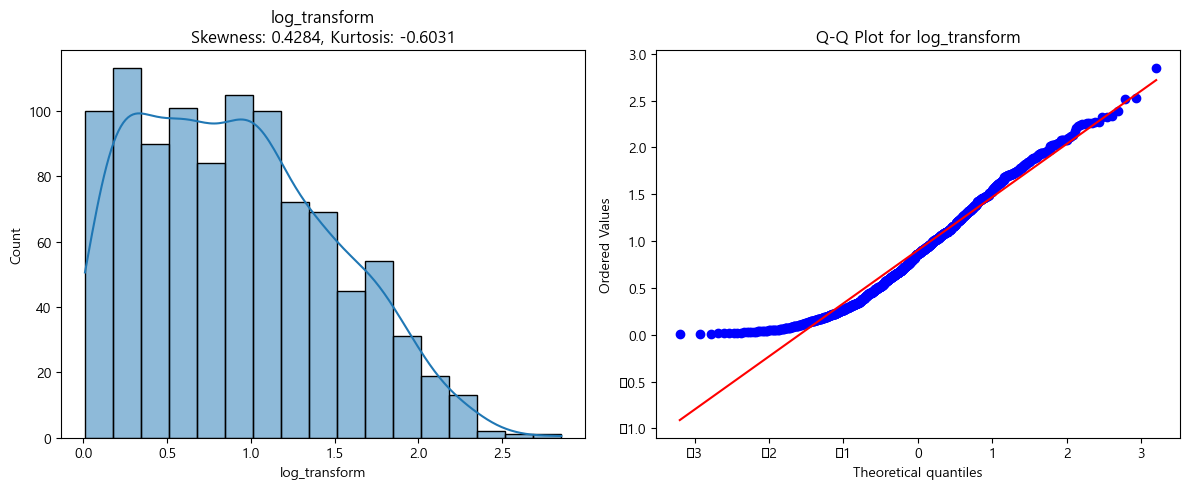

C:\Users\magpi\AppData\Local\Temp\ipykernel_22992\1204215485.py:34: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\magpi\anaconda3\envs\eda_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


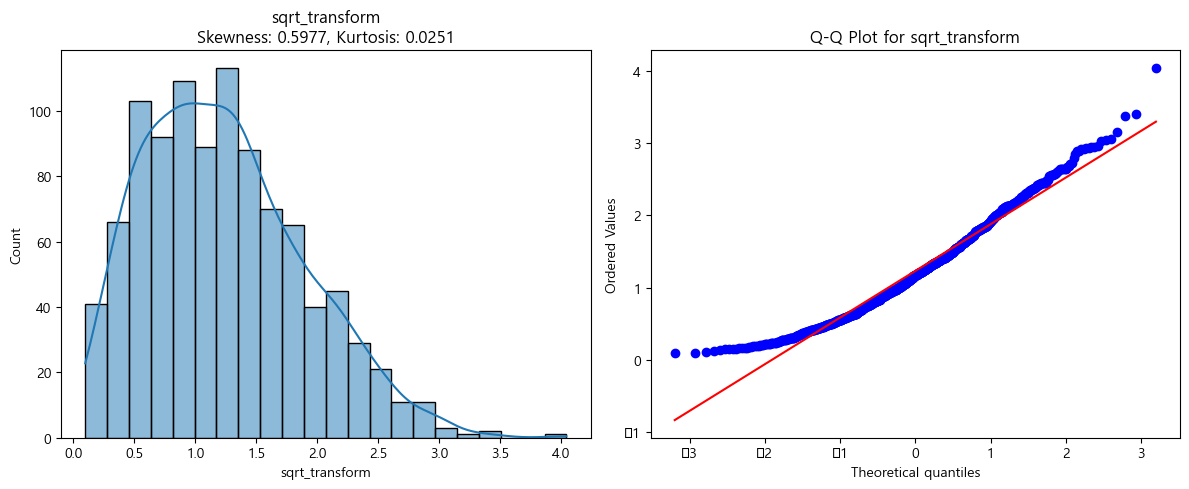

C:\Users\magpi\AppData\Local\Temp\ipykernel_22992\1204215485.py:34: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\magpi\anaconda3\envs\eda_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


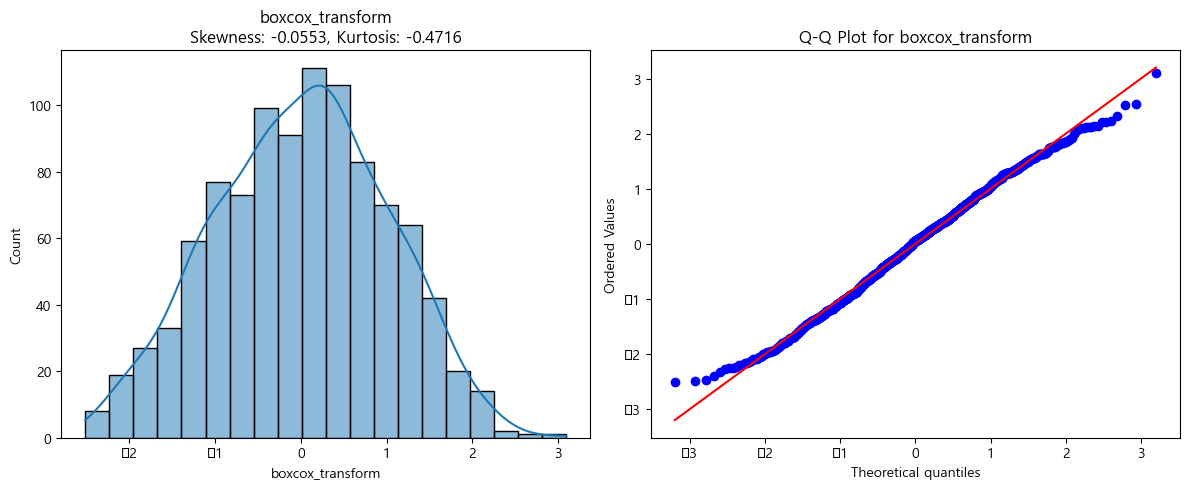

C:\Users\magpi\AppData\Local\Temp\ipykernel_22992\1204215485.py:34: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\magpi\anaconda3\envs\eda_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


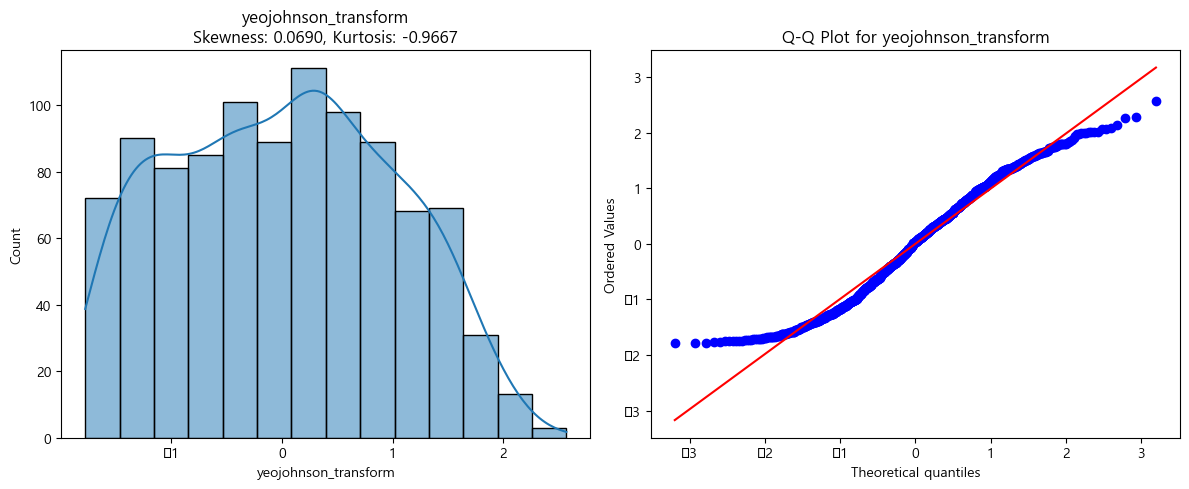


정규성 변환 결과 (왜도):
original_data: 1.8650
log_transform: 0.4284
sqrt_transform: 0.5977
boxcox_transform: -0.0553
yeojohnson_transform: 0.0690

가장 정규분포에 가까운 변환 방법: boxcox_transform (왜도: -0.0553)

정규성 검정 결과 (샤피로-윌크 테스트):
original_data: p-value = 0.000000 -> 정규분포 아님
log_transform: p-value = 0.000000 -> 정규분포 아님
sqrt_transform: p-value = 0.000000 -> 정규분포 아님
boxcox_transform: p-value = 0.003680 -> 정규분포 아님
yeojohnson_transform: p-value = 0.000000 -> 정규분포 아님


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PowerTransformer

# 1. 왜도가 있는 데이터 생성 (오른쪽 꼬리가 긴 분포)
np.random.seed(42)
skewed_data = np.random.exponential(scale=2.0, size=1000)

# 2. 데이터 프레임 생성
df = pd.DataFrame({
    'original_data': skewed_data
})

# 3. 데이터 분포 확인 및 왜도 계산
def check_distribution(data, title):
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    
    plt.figure(figsize=(12, 5))
    
    # 히스토그램
    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True)
    plt.title(f'{title}\nSkewness: {skewness:.4f}, Kurtosis: {kurtosis:.4f}')
    
    # QQ 플롯
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {title}')
    
    plt.tight_layout()
    plt.show()
    
    return skewness, kurtosis

print("원본 데이터 왜도:", stats.skew(df['original_data']))

# 4. 여러 정규성 변환 방법 적용

# 4.1 로그 변환 (log transformation)
# 0 이하의 값이 없을 때 사용 가능
df['log_transform'] = np.log1p(df['original_data'])  # log(1+x) - 0에 가까운 값도 처리 가능

# 4.2 제곱근 변환 (square root transformation)
# 0 이상의 값에 적용 가능
df['sqrt_transform'] = np.sqrt(df['original_data'])

# 4.3 Box-Cox 변환
# 모든 값이 양수여야 함
pt_boxcox = PowerTransformer(method='box-cox')
df['boxcox_transform'] = pt_boxcox.fit_transform(df[['original_data']])

# 4.4 Yeo-Johnson 변환
# 음수값도 처리 가능
pt_yeojohnson = PowerTransformer(method='yeo-johnson')
df['yeojohnson_transform'] = pt_yeojohnson.fit_transform(df[['original_data']])

# 5. 결과 확인
transformations = ['original_data', 'log_transform', 'sqrt_transform', 'boxcox_transform', 'yeojohnson_transform']
skewness_results = {}

for col in transformations:
    skewness, kurtosis = check_distribution(df[col], col)
    skewness_results[col] = skewness

# 6. 왜도 결과 요약
print("\n정규성 변환 결과 (왜도):")
for method, skew_value in skewness_results.items():
    print(f"{method}: {skew_value:.4f}")

# 7. 최적 변환 방법 찾기
# 절대값이 가장 작은 왜도를 가진 변환 방법 찾기
best_method = min(skewness_results.items(), key=lambda x: abs(x[1]))
print(f"\n가장 정규분포에 가까운 변환 방법: {best_method[0]} (왜도: {best_method[1]:.4f})")

# 8. 샤피로-윌크 정규성 검정
# p-value가 0.05보다 크면 정규분포로 간주할 수 있음
print("\n정규성 검정 결과 (샤피로-윌크 테스트):")
for col in transformations:
    stat, p_value = stats.shapiro(df[col])
    result = "정규분포임" if p_value > 0.05 else "정규분포 아님"
    print(f"{col}: p-value = {p_value:.6f} -> {result}")

## 첨도 실제 적용

고객 지출 패턴 분석 결과:
평균 지출액: $60.31
중앙값 지출액: $49.98
표준편차: $43.53
왜도: 1.7168
첨도(Fisher): 2.3457
첨도(Pearson): 5.3457

고객 세그먼트별 지출 통계:
                   고객 수  최소 지출   최대 지출   평균 지출  중앙값 지출   표준편차
spending_category                                            
저지출 고객              163   4.59   29.75   16.08   15.83   5.61
중간지출 고객             686  30.12   77.28   50.30   50.16   9.27
고지출 고객              151  80.79  225.81  153.50  155.60  29.41

첨도 기반 비즈니스 인사이트:
첨도가 높습니다 (Pearson 첨도: 5.35), 이는 고객 지출 패턴에 두꺼운 꼬리가 있음을 의미합니다.
1. VIP 프로그램: 고지출 고객을 위한 특별 서비스와 리워드를 제공하세요.
2. 저지출 고객 활성화: 저지출 고객의 참여를 높이기 위한 타겟 프로모션을 개발하세요.
3. 리스크 관리: 고지출 고객의 이탈을 방지하기 위한 조기 경고 시스템을 구축하세요.
4. 마케팅 최적화: 고객 세그먼트별로 마케팅 예산을 차별화하여 배분하세요.

월별 지출 구간별 고객 분포:
  지출 구간($)  고객 수  비율(%)
0     0-20   126   12.6
1    20-40   132   13.2
2    40-60   492   49.2
3    60-80    99    9.9
4   80-100     5    0.5
5  100-150    64    6.4
6  150-200    72    7.2
7  200-250    10    1.0

상위 10명의 고객 (잠재 VIP):
    customer_id  monthly_spending spending

C:\Users\magpi\AppData\Local\Temp\ipykernel_15256\3468715016.py:99: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_stats = customer_df.groupby('spending_category')['monthly_spending'].agg([


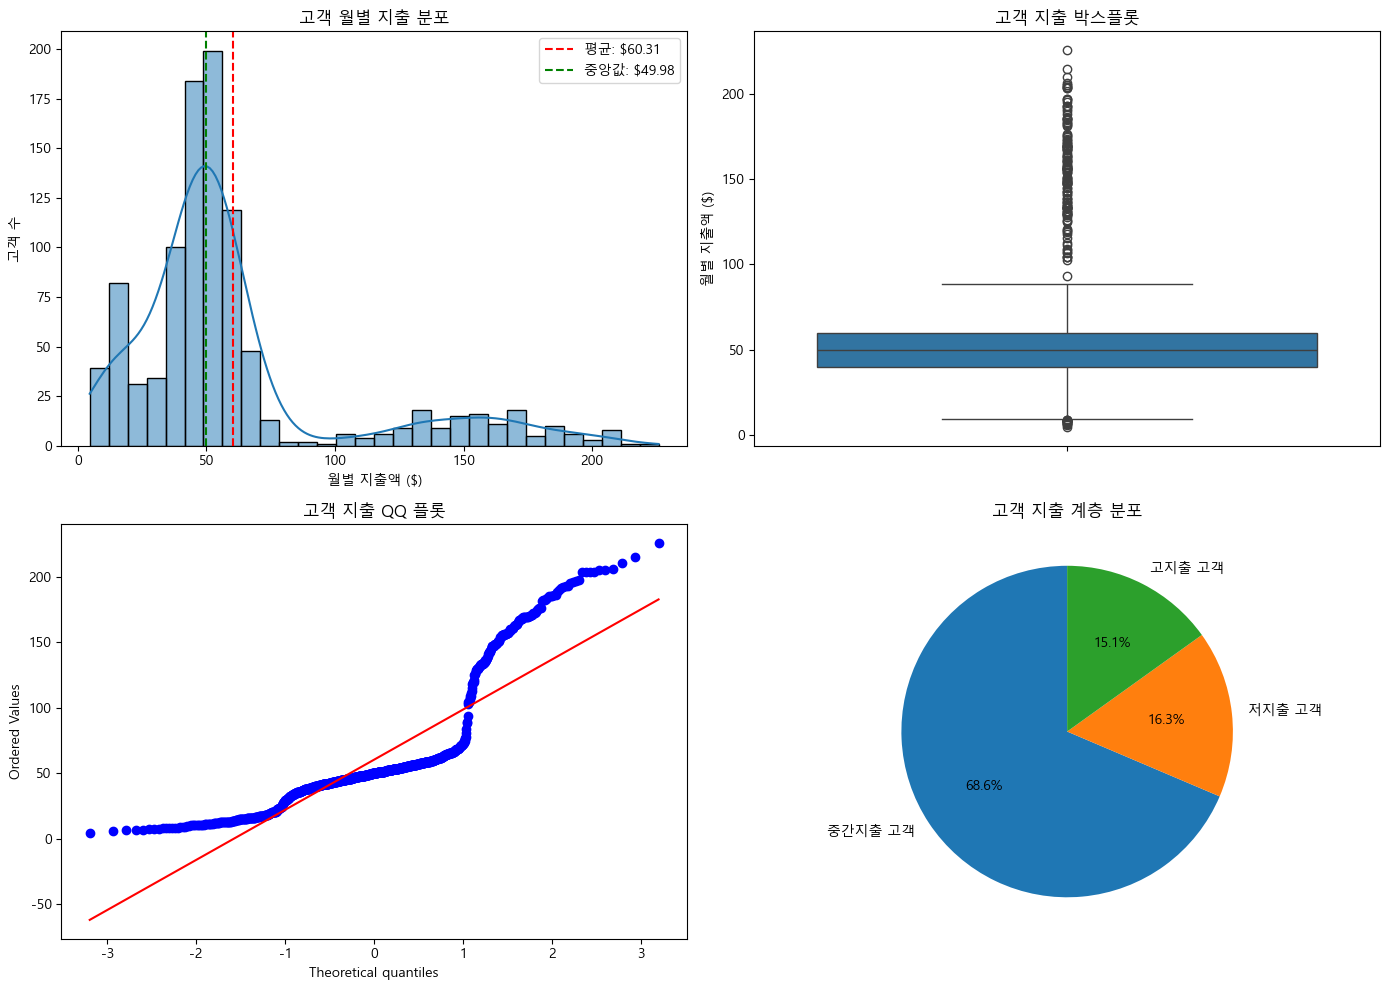

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random

# 재현 가능성을 위해 시드 설정
np.random.seed(42)
random.seed(42)

# 고객 지출 데이터 시뮬레이션 (현실적인 소매 지출 패턴)
# 대부분 고객은 중간 범위에서 지출하고, 소수는 매우 적게 또는 매우 많이 지출
def generate_customer_spending(n_customers=1000):
    # 중간 범위 고객 (전체의 약 70%)
    mid_spending = np.random.normal(loc=50, scale=10, size=int(n_customers * 0.7))
    
    # 저지출 고객 (전체의 약 15%)
    low_spending = np.random.normal(loc=15, scale=5, size=int(n_customers * 0.15))
    
    # 고지출 고객 (전체의 약 15%)
    high_spending = np.random.normal(loc=150, scale=30, size=n_customers - int(n_customers * 0.7) - int(n_customers * 0.15))
    
    # 모든 지출 데이터 결합
    all_spending = np.concatenate([mid_spending, low_spending, high_spending])
    
    # 음수 값 제거 (현실적이지 않음)
    all_spending = np.maximum(all_spending, 0)
    
    # 고객 ID 생성
    customer_ids = [f'CUST_{i:04d}' for i in range(n_customers)]
    
    # 데이터프레임 생성
    df = pd.DataFrame({
        'customer_id': customer_ids,
        'monthly_spending': all_spending.round(2)
    })
    
    return df

# 지출 데이터 생성
customer_df = generate_customer_spending(1000)

# 기본 통계 계산
mean_spending = customer_df['monthly_spending'].mean()
median_spending = customer_df['monthly_spending'].median()
std_spending = customer_df['monthly_spending'].std()
skewness = customer_df['monthly_spending'].skew()
kurtosis = customer_df['monthly_spending'].kurtosis()  # Fisher's definition (정규분포는 0)
kurtosis_pearson = kurtosis + 3  # Pearson's definition (정규분포는 3)

# 분석 결과 출력
print("고객 지출 패턴 분석 결과:")
print(f"평균 지출액: ${mean_spending:.2f}")
print(f"중앙값 지출액: ${median_spending:.2f}")
print(f"표준편차: ${std_spending:.2f}")
print(f"왜도: {skewness:.4f}")
print(f"첨도(Fisher): {kurtosis:.4f}")
print(f"첨도(Pearson): {kurtosis_pearson:.4f}")

# 데이터 분포 시각화
plt.figure(figsize=(14, 10))

# 1. 히스토그램
plt.subplot(2, 2, 1)
sns.histplot(customer_df['monthly_spending'], bins=30, kde=True)
plt.axvline(mean_spending, color='r', linestyle='--', label=f'평균: ${mean_spending:.2f}')
plt.axvline(median_spending, color='g', linestyle='--', label=f'중앙값: ${median_spending:.2f}')
plt.title('고객 월별 지출 분포')
plt.xlabel('월별 지출액 ($)')
plt.ylabel('고객 수')
plt.legend()

# 2. 박스플롯
plt.subplot(2, 2, 2)
sns.boxplot(y=customer_df['monthly_spending'])
plt.title('고객 지출 박스플롯')
plt.ylabel('월별 지출액 ($)')

# 3. QQ 플롯 (정규성 검정)
plt.subplot(2, 2, 3)
stats.probplot(customer_df['monthly_spending'], plot=plt)
plt.title('고객 지출 QQ 플롯')

# 4. 지출 계층 파이 차트
plt.subplot(2, 2, 4)
spending_bins = [0, 30, 80, float('inf')]
spending_labels = ['저지출 고객', '중간지출 고객', '고지출 고객']
customer_df['spending_category'] = pd.cut(customer_df['monthly_spending'], 
                                         bins=spending_bins, 
                                         labels=spending_labels)
category_counts = customer_df['spending_category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('고객 지출 계층 분포')

plt.tight_layout()

# 고객 세그먼트별 특성 분석
segment_stats = customer_df.groupby('spending_category')['monthly_spending'].agg([
    'count', 'min', 'max', 'mean', 'median', 'std'
]).round(2)
segment_stats.columns = ['고객 수', '최소 지출', '최대 지출', '평균 지출', '중앙값 지출', '표준편차']

print("\n고객 세그먼트별 지출 통계:")
print(segment_stats)

# 첨도 기반 비즈니스 인사이트
print("\n첨도 기반 비즈니스 인사이트:")
if kurtosis_pearson > 5:
    print(f"첨도가 높습니다 (Pearson 첨도: {kurtosis_pearson:.2f}), 이는 고객 지출 패턴에 두꺼운 꼬리가 있음을 의미합니다.")
    print("1. VIP 프로그램: 고지출 고객을 위한 특별 서비스와 리워드를 제공하세요.")
    print("2. 저지출 고객 활성화: 저지출 고객의 참여를 높이기 위한 타겟 프로모션을 개발하세요.")
    print("3. 리스크 관리: 고지출 고객의 이탈을 방지하기 위한 조기 경고 시스템을 구축하세요.")
    print("4. 마케팅 최적화: 고객 세그먼트별로 마케팅 예산을 차별화하여 배분하세요.")
elif kurtosis_pearson < 2:
    print(f"첨도가 낮습니다 (Pearson 첨도: {kurtosis_pearson:.2f}), 이는 고객 지출이 균등하게 분포되어 있음을 의미합니다.")
    print("1. 일반적인 마케팅: 전반적인 브랜드 인지도를 높이는 전략이 효과적일 수 있습니다.")
    print("2. 다양한 가격대: 다양한 가격대의 제품/서비스를 제공하세요.")
else:
    print(f"첨도가 보통입니다 (Pearson 첨도: {kurtosis_pearson:.2f}), 이는 고객 지출이 정규분포에 가까움을 의미합니다.")
    print("1. 균형적인 전략: 프리미엄과 대중적인 제품/서비스를 균형있게 제공하세요.")
    print("2. 데이터 지속 모니터링: 시간에 따른 지출 패턴 변화를 모니터링하세요.")

# 월별 지출 구간별 고객 수 테이블
spend_bins = [0, 20, 40, 60, 80, 100, 150, 200, 250]
spend_counts = pd.cut(customer_df['monthly_spending'], bins=spend_bins).value_counts().sort_index()
spend_percent = (spend_counts / len(customer_df) * 100).round(1)

spend_table = pd.DataFrame({
    '지출 구간($)': [f'{spend_bins[i]}-{spend_bins[i+1]}' for i in range(len(spend_bins)-1)],
    '고객 수': spend_counts.values,
    '비율(%)': spend_percent.values
})

print("\n월별 지출 구간별 고객 분포:")
print(spend_table)

# 상위 10명의 고객 데이터
top_customers = customer_df.nlargest(10, 'monthly_spending')
print("\n상위 10명의 고객 (잠재 VIP):")
print(top_customers)

# 하위 10명의 고객 데이터
bottom_customers = customer_df.nsmallest(10, 'monthly_spending')
print("\n하위 10명의 고객 (활성화 대상):")
print(bottom_customers)